# Week 2: Python and Metro

## A quick geopandas teaser
Following our Python bootcamp last week (was it boring? exhilerating? a bit of both?), let's put that programming knowledge into action, using and creating data that reflects a real urban situation.

We start by importing a new module `geopandas`. This is a pretty high level geospatial library, widely used by spatial data scientists all over the world. Don't worry about it too much for now, but know that it allows us to import a variety of spatial data formats, and plot them on a map.

In [1]:
import geopandas as gpd

Next, we import some data. In this case, it is a shapefile I downloaded from the [LA Metro's Developer web portal](https://developer.metro.net/bus-rail-gis-data/). Notice that I am using relative paths to point to where the data is located in. the `../` indicates that it is one folder level above, so `../../` takes us two levels above (the project root), and then into the data folder there.

In [2]:
metro = gpd.read_file('../../data/MetroStations/Stations_All_0715.shp')

<div class="alert alert-info">

Note that the reason we use `geopandas` instead of `pandas` (other than the fact that we love maps) is that `pandas` cannot read shapefiles, whereas `geopandas` can.
    
</div>

In [3]:
# what's the data type?
type(metro)

geopandas.geodataframe.GeoDataFrame

In [4]:
# what does the data look like? 
metro.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (6504120.152 1745681.179)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (6503995.170 1752228.119)


Ah! Surprise, surprise. Welcome to your first look at a pandas dataframe. We will cover dataframes more extensively in later sessions, but know that a python dataframe is like an excel spreadsheet. 

The `head()` command shows us the first 5 rows of the dataframe. You can also use `tail()` and `sample()`. Try these commands in the cells below:

In [5]:
# try tail()


In [6]:
# try sample()


## Pandas Data Types

Let's look a the data types for each column. You can collectively get all the datatypes for each column in a dataframe using the `dtypes` command.

In [7]:
metro.dtypes

LINE           object
LINENUM         int64
LINENUM2        int64
STNSEQ          int64
STNSEQ2         int64
DIR            object
STOPNUM         int64
STATION        object
LAT           float64
LONG          float64
TPIS_NAME      object
POINT_X       float64
POINT_Y       float64
geometry     geometry
dtype: object

But there is better command that will get you more info. Yes, the `info` command.

In [8]:
# dataframe info
metro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LINE       83 non-null     object  
 1   LINENUM    83 non-null     int64   
 2   LINENUM2   83 non-null     int64   
 3   STNSEQ     83 non-null     int64   
 4   STNSEQ2    83 non-null     int64   
 5   DIR        3 non-null      object  
 6   STOPNUM    83 non-null     int64   
 7   STATION    83 non-null     object  
 8   LAT        83 non-null     float64 
 9   LONG       83 non-null     float64 
 10  TPIS_NAME  83 non-null     object  
 11  POINT_X    83 non-null     float64 
 12  POINT_Y    83 non-null     float64 
 13  geometry   83 non-null     geometry
dtypes: float64(4), geometry(1), int64(5), object(4)
memory usage: 9.2+ KB


Wait. That looks different from what we have worked on! As it turns out, pandas datatypes are slightly different from the raw python datatypes. Check out the table below:

<table class="table table-striped">
  <thead>
    <tr>
      <th>Pandas Type</th>
      <th>Native Python Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>object</td>
      <td>string</td>
      <td>The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings).</td>
    </tr>
    <tr>
      <td>int64</td>
      <td>int</td>
      <td>Numeric characters. 64 refers to the memory allocated to hold this character.</td>
    </tr>
    <tr>
      <td>float64</td>
      <td>float</td>
      <td>Numeric characters with decimals. If a column contains numbers and NaNs (see below), pandas will default to float64, in case your missing value has a decimal.</td>
    </tr>
    <tr>
      <td>datetime64, timedelta[ns]</td>
      <td>N/A (but see the <a href="http://doc.python.org/2/library/datetime.html">datetime</a> module in Python’s standard library)</td>
      <td>Values meant to hold time data. Look into these for time series experiments.</td>
    </tr>
  </tbody>
</table>

## Counting unique values in a column

In [9]:
metro['LINE'].value_counts()

Gold          21
Blue          20
Green         14
EXPO          10
Red            8
Red/Purple     6
Purple         2
Blue/EXPO      2
Name: LINE, dtype: int64

In [10]:
# try it yourself. find the unique values for LINENUM


## Subsetting

In [11]:
expo = metro[metro.LINE == 'EXPO']
expo.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
20,EXPO,806,0,10,0,None,80123,LATTC / Ortho Institute Station,34.029112,-118.273603,LATTC/Ortho,6.478766e+06,1.833089e+06,POINT (6478766.175 1833089.413)
21,EXPO,806,0,9,0,None,80124,Jefferson / USC Station,34.022123,-118.278118,Jeff/USC,6.477391e+06,1.830550e+06,POINT (6477391.116 1830549.740)
22,EXPO,806,0,8,0,None,80125,Expo Park / USC Station,34.018227,-118.285734,Expo Pk,6.475079e+06,1.829138e+06,POINT (6475079.285 1829138.386)
23,EXPO,806,0,7,0,None,80126,Expo / Vermont Station,34.018245,-118.291540,Ex/Vrmnt,6.473320e+06,1.829150e+06,POINT (6473319.888 1829149.989)
24,EXPO,806,0,6,0,None,80127,Expo / Western Station,34.018331,-118.308910,Ex/Wstrn,6.468056e+06,1.829197e+06,POINT (6468056.285 1829197.007)


In [12]:
# try it yourself. create variables for each of unique LINE in the dataframe


## Plotting

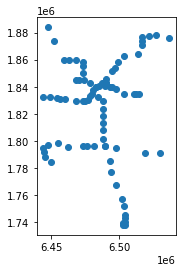

In [13]:
metro.plot()

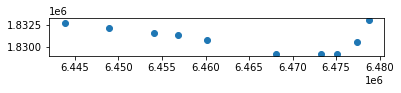

In [14]:
expo.plot()

And then we plot it. Don't worry about the intricacies of the syntax just yet (we will learn this in much more detail later), but remember, "command, bracket, arguments!"

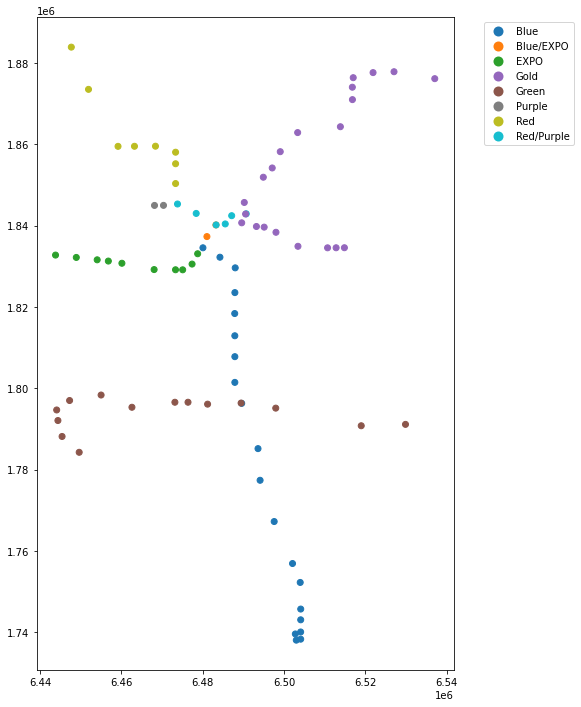

In [15]:
metro.plot(figsize=(20,12),   #size of the plot (a bit bigger than the default)
           column = 'LINE', # column that defines the color of the dots
           legend = True,      # add a legend           
           legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
           } # this puts the legend to the side
          ) 


## Back to mapping
We can't finish our lesson without a map :). Let's go back to the original metro dataset that was the inspiration for this notebook. Recall that we used the module `geopandas` to define the data.

In [16]:
metro.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (6504120.152 1745681.179)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (6503995.170 1752228.119)


## Projections

In [17]:
# what is the projection?
metro.crs

<Projected CRS: EPSG:2874>
Name: NAD83(HARN) / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - California - SPCS83 - 5
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
# let's reproject it
metro_gcs = metro.to_crs("EPSG:4326")

In [19]:
type(metro_gcs.geometry)

geopandas.geoseries.GeoSeries

Now it's time for another module. Everybody, please welcome `folium`. Folium brings leaflet, an open source javascript mapping library into our Python environment, allowing you to create instant interactive maps. Try it:

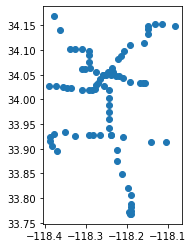

In [20]:
metro_gcs.plot()

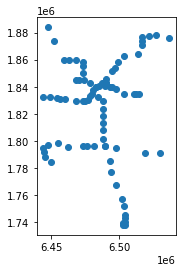

In [21]:
# what did it look like before we reprojected it?
metro.plot()

## Iterating through rows in a dataframe

You learned how to loop through a python list. Looping over rows in a dataframe is similar, but the syntax is slightly different.

In [43]:
for index, row in metro_gcs.iterrows():
    print(row.STATION, row.LINE)

Downtown Long Beach Station Blue
Pacific Ave Station Blue
Anaheim Street Station Blue
Pacific Coast Hwy Station Blue
Willow Street Station Blue
Wardlow Station Blue
Del Amo Station Blue
Artesia Station Blue
Compton Station Blue
Willowbrook - Rosa Parks Station - Metro Blue Line Blue
103rd Street / Watts Towers  Station Blue
Firestone Station Blue
Florence Station Blue
Slauson Station Blue
Vernon Station Blue
Washington Station Blue
San Pedro Street Station Blue
Grand / LATTC Station Blue
Pico Station Blue/EXPO
7th Street / Metro Center Station - Metro Blue & Expo Lines Blue/EXPO
LATTC / Ortho Institute Station EXPO
Jefferson / USC Station EXPO
Expo Park / USC Station EXPO
Expo / Vermont Station EXPO
Expo / Western Station EXPO
Expo / Crenshaw Station EXPO
Farmdale Station EXPO
Expo / La Brea / Ethel Bradley Station EXPO
La Cienega / Jefferson Station EXPO
Culver City Station EXPO
1st Street Station Blue
5th Street Station Blue
North Hollywood Station Red
Universal / Studio City Station

In [38]:
metro_gcs.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (-118.19292 33.76807)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (-118.19370 33.77226)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (-118.18938 33.78183)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (-118.18938 33.78909)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (-118.18983 33.80708)


## Get average lat/lon's

In [69]:
latitude = metro.LAT.mean()
latitude

34.00158291566265

In [70]:
longitude = metro.LONG.mean()
longitude

-118.251045313253

In [29]:
import folium

In [71]:
#initialize map
m = folium.Map(location=[latitude,longitude], tiles='Stamen Terrain', zoom_start=10)
m

In [72]:
# add the stations
for index, row in metro.iterrows():
    folium.Marker([row.LAT,row.LONG], popup=row.STATION, tooltip=row.STATION).add_to(m)
m

In [45]:
# add a column
metro['color'] = ''

In [46]:
metro.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry,color
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828),
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050),
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068),
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (6504120.152 1745681.179),
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (6503995.170 1752228.119),


## Unique values in a column

In [54]:
metro.LINE.unique()

array(['Blue', 'Blue/EXPO', 'EXPO', 'Red', 'Red/Purple', 'Purple',
       'Green', 'Gold'], dtype=object)

In [61]:
# display rows that match a query
metro.loc[metro['LINE'] == 'EXPO']

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry,color
20,EXPO,806,0,10,0,None,80123,LATTC / Ortho Institute Station,34.029112,-118.273603,LATTC/Ortho,6.478766e+06,1.833089e+06,POINT (6478766.175 1833089.413),yellow
21,EXPO,806,0,9,0,None,80124,Jefferson / USC Station,34.022123,-118.278118,Jeff/USC,6.477391e+06,1.830550e+06,POINT (6477391.116 1830549.740),yellow
22,EXPO,806,0,8,0,None,80125,Expo Park / USC Station,34.018227,-118.285734,Expo Pk,6.475079e+06,1.829138e+06,POINT (6475079.285 1829138.386),yellow
23,EXPO,806,0,7,0,None,80126,Expo / Vermont Station,34.018245,-118.291540,Ex/Vrmnt,6.473320e+06,1.829150e+06,POINT (6473319.888 1829149.989),yellow
24,EXPO,806,0,6,0,None,80127,Expo / Western Station,34.018331,-118.308910,Ex/Wstrn,6.468056e+06,1.829197e+06,POINT (6468056.285 1829197.007),yellow
25,EXPO,806,0,5,0,None,80128,Expo / Crenshaw Station,34.022526,-118.335078,Ex/Crnshw,6.460132e+06,1.830749e+06,POINT (6460131.596 1830749.046),yellow
26,EXPO,806,0,4,0,None,80129,Farmdale Station,34.023981,-118.346095,Farmdale,6.456795e+06,1.831290e+06,POINT (6456795.070 1831289.858),yellow
27,EXPO,806,0,3,0,None,80130,Expo / La Brea / Ethel Bradley Station,34.024803,-118.355159,Ex/LBrea,6.454050e+06,1.831599e+06,POINT (6454049.620 1831598.579),yellow
28,EXPO,806,0,2,0,None,80131,La Cienega / Jefferson Station,34.026355,-118.372120,LCienega,6.448912e+06,1.832182e+06,POINT (6448912.366 1832181.972),yellow
29,EXPO,806,0,1,0,None,80132,Culver City Station,34.027896,-118.388986,CulvrCty,6.443804e+06,1.832762e+06,POINT (6443804.075 1832762.116),yellow


## Update a column based on a query on another column

In [75]:
metro.loc[metro['LINE'] == 'EXPO', 'color'] = 'orange'

In [62]:
metro.loc[metro['LINE'] == 'Blue', 'color'] = 'blue'
metro.loc[metro['LINE'] == 'Blue/EXPO', 'color'] = 'cadetblue'
metro.loc[metro['LINE'] == 'Red', 'color'] = 'red'
metro.loc[metro['LINE'] == 'Red/Purple', 'color'] = 'darkred'
metro.loc[metro['LINE'] == 'Purple', 'color'] = 'purple'
metro.loc[metro['LINE'] == 'Green', 'color'] = 'green'
metro.loc[metro['LINE'] == 'Gold', 'color'] = 'beige'



In [63]:
metro.sample(5)

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry,color
25,EXPO,806,0,5,0,None,80128,Expo / Crenshaw Station,34.022526,-118.335078,Ex/Crnshw,6.460132e+06,1.830749e+06,POINT (6460131.596 1830749.046),yellow
24,EXPO,806,0,6,0,None,80127,Expo / Western Station,34.018331,-118.308910,Ex/Wstrn,6.468056e+06,1.829197e+06,POINT (6468056.285 1829197.007),yellow
15,Blue,801,0,5,0,None,80118,Washington Station,34.019650,-118.243084,Washngtn,6.488005e+06,1.829622e+06,POINT (6488004.949 1829622.245),blue
41,Red/Purple,802,805,5,5,None,80210,Westlake / MacArthur Park Station,34.056368,-118.274879,Westlake,6.478407e+06,1.843009e+06,POINT (6478406.678 1843009.425),darkred
32,Red,802,0,14,0,None,80201,North Hollywood Station,34.168504,-118.376808,NoHo,6.447686e+06,1.883918e+06,POINT (6447685.807 1883917.608),red


In [76]:
# add the stations with color icons
for index, row in metro.iterrows():
    folium.Marker([row.LAT,row.LONG], popup=row.STATION, tooltip=row.STATION,icon=folium.Icon(color=row.color)).add_to(m)
m